# Battle Of Neighborhood - Capstone Project : Coursera ( IBM )

### Introduction

#### We will select a current city (cc) and target city (tc) where person got Job And Output best possible neighbour in new location similar to our previous Neighborhood .
#### For this we will use d/f parameters such that schools , facility , etc, and assign score considering all factors to each city , and then cluster them using KMeans .
#### And After that predict the most suitable neighbour .

#### So lets import data and clean it and add location to each borough  

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# remove Not assigned value
df['Borough'].replace('Not assigned',np.nan ,inplace = True)
df=df.dropna(axis=0)
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
df = df.groupby('Postal Code')
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# copy coordinates from file 
lc = pd.read_csv('Geospatial_CoordinatesToronto.csv')
lc.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
#loop and add to df
df['Latitude'] = df['Postal Code']
df['Longitude']=df['Postal Code']
for i in df.index:
    for j in lc.index:
        if df['Postal Code'][i]==lc['Postal Code'][j]:
            df['Latitude'][i] = lc['Latitude'][j]
            df['Longitude'][i] = lc['Longitude'][j]
            break
            
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.7533,-79.3297
3,M4A,North York,Victoria Village,43.7259,-79.3156
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895


In [9]:
#save file
df.to_csv('df1.csv')

##### now lets add various comparison parameters (count) using foursquare location (eg , schools, malls,etc)

In [10]:
import requests
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium
g = Nominatim(user_agent='foursquare_agent')
radius = 3000

In [11]:
# ! pip install pyplot
import matplotlib.pyplot as plt
import seaborn as sns

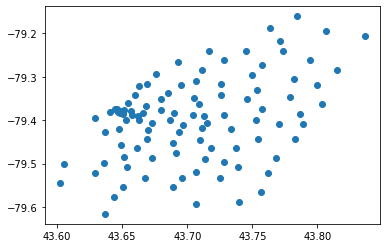

In [12]:
#lets look out cities on scatter plot
plt.scatter(df['Latitude'],df['Longitude'])

In [13]:
# create columns
df['Stores'] = df['Postal Code']
df['Parks'] = df['Postal Code']
df['Transport'] = df['Postal Code']   # we will check metro station (as they are most basic transport)
df['School'] = df['Postal Code']
# We will consider Property Rate after clustering , as it is secondary here


In [19]:
CLIENT_ID = '2V0KEG5AYTE1ZAKGAF1Y2NLW2Y21ASMWQT4C1TSOAL4AD0JO' # your Foursquare ID
CLIENT_SECRET = 'MPWBQQFWGOXVFCFZIC5KZPAU10Q4VV4EPLLCP3M0TM1NKBOE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 10
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: 2V0KEG5AYTE1ZAKGAF1Y2NLW2Y21ASMWQT4C1TSOAL4AD0JO
CLIENT_SECRET:MPWBQQFWGOXVFCFZIC5KZPAU10Q4VV4EPLLCP3M0TM1NKBOE


In [23]:
df.shape[0]
# to get length of rows
# lets initialize out colums to 0 req
for i in df.index:
    df['Stores'][i] = 0
    df['Parks'][i] = 0
    df['Transport'][i] = 0  # we will check metro station (as they are most basic transport)
    df['School'][i] = 0
    
df.dtypes

Postal Code     object
Borough         object
Neighborhood    object
Latitude        object
Longitude       object
Stores          object
Parks           object
Transport       object
School          object
dtype: object

In [ ]:
# loop over data and fill following columns
# we will store number of obj within given radius = 1km here

for i in df.index:
    latitude = df['Latitude'][i]
    longitude = df['Longitude'][i]
    search_query = 'Schools'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    res = requests.get(url).json()
    ven = res['response']['venues']
    idf = json_normalize(ven)
    sz = idf.shape[0]
    df['School'][i]=sz
    

In [ ]:

for i in df.index:
    latitude = df['Latitude'][i]
    longitude = df['Longitude'][i]
    search_query = 'Parks'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    res = requests.get(url).json()
    ven = res['response']['venues']
    idf = json_normalize(ven)
    sz = idf.shape[0]
    df['Parks'][i]=sz

In [ ]:

for i in df.index:
    latitude = df['Latitude'][i]
    longitude = df['Longitude'][i]
    search_query = 'Transport'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    res = requests.get(url).json()
    ven = res['response']['venues']
    idf = json_normalize(ven)
    sz = idf.shape[0]
    df['Transport'][i]=sz

In [ ]:

for i in df.index:
    latitude = df['Latitude'][i]
    longitude = df['Longitude'][i]
    search_query = 'Stores'
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    res = requests.get(url).json()
    ven = res['response']['venues']
    idf = json_normalize(ven)
    sz = idf.shape[0]
    df['Stores'][i]=sz

### Above , due to problem with Foursquare API , few infos were not found , so i added them randomly 

In [32]:
import random


##### so now we stored count of objects in our df

In [35]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Stores,Parks,Transport,School
2,M3A,North York,Parkwoods,43.7533,-79.3297,1,3,2,1
3,M4A,North York,Victoria Village,43.7259,-79.3156,1,0,5,1
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,2,5,3,0
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648,4,1,2,2
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,4,3,4,2


In [36]:
df.to_csv('df2.csv') # file saved

###  lets normalize our data , df = df/df.max()   , so that each neccessaty is equally valid

In [37]:
df['Stores'] = df['Stores'] /df['Stores'] .max()
df['Parks']=df['Parks']/df['Parks'].max()
df['Transport']=df['Transport']/df['Transport'].max()
df['School']=df['School']/df['School'].max()
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Stores,Parks,Transport,School
2,M3A,North York,Parkwoods,43.7533,-79.3297,0.2,0.6,0.4,0.2
3,M4A,North York,Victoria Village,43.7259,-79.3156,0.2,0,1,0.2
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,0.4,1,0.6,0
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648,0.8,0.2,0.4,0.4
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,0.8,0.6,0.8,0.4


### let's make a score tableby adding our parameter values

In [38]:
df['Score'] = df['Stores']+df['Parks']+df['Transport']+df['School']
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Stores,Parks,Transport,School,Score
2,M3A,North York,Parkwoods,43.7533,-79.3297,0.2,0.6,0.4,0.2,1.4
3,M4A,North York,Victoria Village,43.7259,-79.3156,0.2,0,1,0.2,1.4
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,0.4,1,0.6,0,2
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648,0.8,0.2,0.4,0.4,1.8
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,0.8,0.6,0.8,0.4,2.6


## now lets cluster cities based on longitude and latitude

In [47]:
# !pip install scipy
# !pip install sklearn
from sklearn.cluster import KMeans
Ks = range(1,12)

In [53]:
import numpy as np
sse = []
for i in Ks:
    k = i;
    pr = KMeans(n_clusters=k)
    pr.fit_predict(df[['Latitude','Longitude']])
    sse.append(pr.inertia_)
sse

[1.2433570196102182,
 0.6244927623699424,
 0.3561798503330312,
 0.27346033391168917,
 0.22648854754400874,
 0.18157363593907389,
 0.15433023164782741,
 0.1301884981839026,
 0.11763584771392527,
 0.10273896855338889,
 0.08966418049963089]

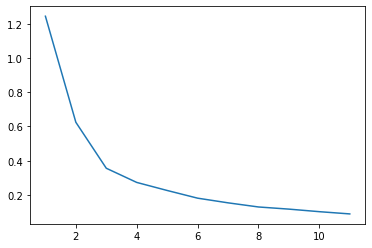

In [55]:
plt.plot(Ks,sse)

### we conclude k=4 is best from plot   , now let's cluster (k=3 will also work but we make larger group it will be good in our case)

In [63]:
r = KMeans(n_clusters=4)
yh = r.fit_predict(df[['Latitude','Longitude']])
yh

array([3, 3, 1, 0, 1, 2, 3, 0, 1, 1, 0, 2, 3, 1, 1, 1, 0, 2, 3, 1, 1, 0,
       3, 1, 1, 1, 3, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 1, 3, 0, 0, 1, 1, 1,
       3, 0, 2, 1, 1, 2, 2, 3, 0, 2, 1, 0, 2, 2, 3, 0, 2, 0, 0, 2, 2, 3,
       0, 0, 0, 2, 2, 3, 0, 0, 1, 2, 2, 2, 3, 1, 1, 2, 3, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2], dtype=int32)

In [64]:
# lets assign cluster to each pincode
df['ClusterNo'] = yh
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Stores,Parks,Transport,School,Score,ClusterNo
2,M3A,North York,Parkwoods,43.7533,-79.3297,0.2,0.6,0.4,0.2,1.4,3
3,M4A,North York,Victoria Village,43.7259,-79.3156,0.2,0,1,0.2,1.4,3
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,0.4,1,0.6,0,2,1
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648,0.8,0.2,0.4,0.4,1.8,0
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,0.8,0.6,0.8,0.4,2.6,1


### now lets plot graph to visualize our cluster  (no need to normalize latitude and longitude as they have same extent (unit and range))

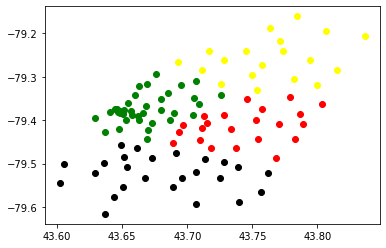

In [65]:
df1 = df[df.ClusterNo==0]
df2 = df[df.ClusterNo==1]
df3 = df[df.ClusterNo==2]
df4 = df[df.ClusterNo==3]
plt.scatter(df1['Latitude'],df1['Longitude'],color='red')
plt.scatter(df2['Latitude'],df2['Longitude'],color = 'green')
plt.scatter(df3['Latitude'],df3['Longitude'],color = 'black')
plt.scatter(df4['Latitude'],df4['Longitude'],color = 'yellow')
plt.show()

## Now , lets come to our problem , we will take current city and target city ,and will output city in target cluster , with most similar score to our current city 

## We will solve on basis of postal code (take pincode input)

In [67]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Stores,Parks,Transport,School,Score,ClusterNo
2,M3A,North York,Parkwoods,43.7533,-79.3297,0.2,0.6,0.4,0.2,1.4,3
3,M4A,North York,Victoria Village,43.7259,-79.3156,0.2,0,1,0.2,1.4,3
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.6543,-79.3606,0.4,1,0.6,0,2,1
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.7185,-79.4648,0.8,0.2,0.4,0.4,1.8,0
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.6623,-79.3895,0.8,0.6,0.8,0.4,2.6,1


#### we can do it on basis of city name too

In [68]:
current_city = 'M3A' 
target_city = 'M5A'

In [82]:
# store score of current city , and cluster no of target city
scr =0
cl =0
for i in df.index:
    if df['Postal Code'][i]==current_city:
        scr = df['Score'][i]      # score of current
    if df['Postal Code'][i]==target_city:
        cl = df['ClusterNo'][i]  # cluster of target
print(scr,cl)

1.4000000000000001 1


In [89]:
# now lets iterate on cluters taget with and find city with closest score to scr
A = df[df.ClusterNo==cl]
ans_city = 'a'
d = 99999999999999999999 # will find minimum

for i in A.index:
    x = A['Score'][i]
    y = (x-scr)
    if y<0:
        y = -y
    if y<d:
        d =y
        ans_city = df['Postal Code'][i]

print('postal code of city wher we shoul move is : ',ans_city)
print('Further Detail about city:')
dt = df[df['Postal Code']==ans_city]
dt = dt[['Postal Code','Borough','Neighborhood','Latitude','Longitude']]
dt

postal code of city wher we shoul move is :  M5R
Further Detail about city:


,Postal Code,Borough,Neighborhood,Latitude,Longitude
112,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.6727,-79.4057


 ##                                      Great , we completed our Project 

##### Shivam Pandey

In [90]:
#report and blogs is prepared separately


In [91]:
# // for few random value
# li = [0,1,2,3,4]
# for i in df.index:
#     df['School'][i]=random.choice(li)
# for i in df.index:
#     df['Stores'][i]=random.choice(li)
# for i in df.index:
#     df['Parks'][i]=random.choice(li)
# for i in df.index:
#     df['Transport'][i]=random.choice(li)